<a href="https://colab.research.google.com/github/stephenbeckr/convex-optimization-class/blob/master/utilities/APPM5630_utilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example driver for using the Python utilities

Shows how to use `firstOrderMethods` in the [`utilities`](https://github.com/stephenbeckr/convex-optimization-class/tree/master/utilities) folder on github

Can be used for HW 10

Stephen Becker for APPM 5630 Advanced Convex Optimization, CU Boulder

In [3]:
import numpy as np
from numpy.linalg import norm
import cvxpy as cvx

from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = [8,6] # or 7, 4 or 10,8
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["lines.markersize"] = 4
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'font.size': 20})

In [2]:
!wget -nv 'https://github.com/stephenbeckr/convex-optimization-class/raw/master/utilities/firstOrderMethods.py'

from firstOrderMethods import gradientDescent, lassoSolver, createTestProblem, runAllTestProblems

2021-04-01 15:33:04 URL:https://raw.githubusercontent.com/stephenbeckr/convex-optimization-class/master/utilities/firstOrderMethods.py [19169/19169] -> "firstOrderMethods.py.3" [1]


Creating test problem for problem type lasso
Iter.  Objective Stepsize  Error
-----  --------- --------  -------
    0  2.25e+00  2.47e-02  7.97e-01
Iter 163 Quitting due to stagnating objective value
  163  2.08e+00  1.28e-01  2.70e-06


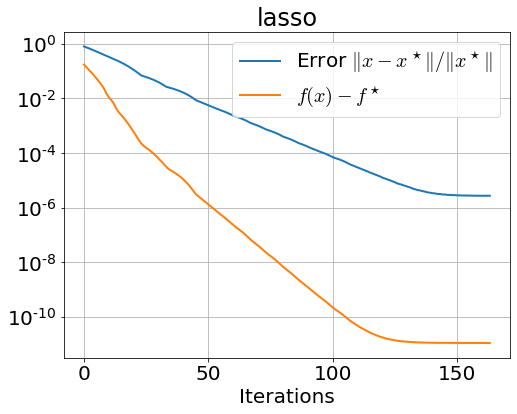

In [5]:
# Try some test problems
problemNumber = 2
rng = np.random.default_rng(1)
if problemNumber == 1:
  prob = createTestProblem( 'quadratic', rng=rng )
  xTrue = prob['xTrue']
  errFcn= lambda x : norm(x-xTrue)/norm(xTrue)
  x0  = np.zeros(prob['n'])
  L   = prob['L']
  xNew, data = gradientDescent(prob['f'],prob['grad'],x0,stepsize=1/L,printEvery=None,
                  errorFunction = errFcn, tol=1e-15, saveHistory=True, 
                  linesearch = True,acceleration=True,restart=100,maxIters=2000)
elif problemNumber == 2:
  prob = createTestProblem( 'lasso', rng=rng )
  xTrue = prob['xTrue']
  errFcn= lambda x : norm(x-xTrue)/norm(xTrue)
  x0  = np.zeros(prob['n'])
  L   = prob['L']
  xNew, data = gradientDescent(prob['f'],prob['grad'],x0,prox=prob['prox'],
                  prox_obj=prob['prox_obj'], stepsize=1/L,printEvery=None,
                  errorFunction = errFcn, tol=1e-20, saveHistory=True, 
                  linesearch=True,acceleration=False,restart=50,c=1e-6)
elif problemNumber == 3:
  prob = createTestProblem( 'logistic', rng=rng )
  xTrue = prob['xTrue']
  errFcn= lambda x : norm(x-xTrue)/norm(xTrue)
  x0  = np.zeros(prob['n'])
  L   = prob['L']
  xNew, data = gradientDescent(prob['f'],prob['grad'],x0,
                  stepsize=1/L,printEvery=None,maxIters=None,
                  errorFunction = errFcn, tol=1e-20, saveHistory=True, 
                  linesearch=True,acceleration=True,restart=None)

## Plot the results
plt.semilogy( data['errHistory'], '-', label='Error $\|x-x^\star\|/\|x^\star\|$')
plt.semilogy(  data['fcnHistory']-prob['fTrue'] , '-', label='$f(x)-f^\star$')
# plt.plot( data['fcnHistory']-prob['fTrue'], '-', label='$f(x)-f^\star$')
plt.grid(True)
plt.xlabel('Iterations')
plt.legend()
plt.title(prob['name'])
plt.show()

In [4]:
# Test out the lasso solver
rng = np.random.default_rng(1)
prob = createTestProblem( 'lasso', rng=rng )
xTrue = prob['xTrue']
errFcn= lambda x : norm(x-xTrue)/norm(xTrue)
x0  = np.zeros(prob['n'])
xNew, data = lassoSolver(prob['A'],prob['b'],prob['tau'],errorFunction=errFcn,
                         linesearch=True,acceleration=True,tol=1e-18,restart=100)
      
print(f"Error in x: {errFcn(xNew):.2e}, after {data['steps']} steps")

Creating test problem for problem type lasso
10
Reached tolerance after 3 iterations.
Iter.  Objective Stepsize  Error
-----  --------- --------  -------
    0  9.35e+01  2.06e-02  6.47e+00
Iter 212 Quitting due to stagnating objective value
  212  2.08e+00  5.35e-02  2.70e-06
Error in x: 2.70e-06, after 212 steps


In [6]:
runAllTestProblems()

Creating test problem for problem type 0
Problem type: quadratic (underdetermined)

  (Linesearch: False  Nesterov acceleration: False )
  Error in x: 1.91e-06, after 5297 steps

  (Linesearch: False  Nesterov acceleration: True )
  Error in x: 5.88e-08, after 485 steps

  (Linesearch: True  Nesterov acceleration: False )
  Error in x: 1.03e-05, after 2198 steps

  (Linesearch: True  Nesterov acceleration: True )
  Error in x: 1.02e-07, after 474 steps

Creating test problem for problem type 1
Problem type: lasso

  (Linesearch: False  Nesterov acceleration: False )
  Error in x: 9.90e-07, after 291 steps

  (Linesearch: False  Nesterov acceleration: True )
  Error in x: 1.37e-06, after 197 steps

  (Linesearch: True  Nesterov acceleration: False )
  Error in x: 2.89e-07, after 56 steps

  (Linesearch: True  Nesterov acceleration: True )
  Error in x: 7.37e-07, after 81 steps

Creating test problem for problem type 2
Problem type: logistic

  (Linesearch: False  Nesterov acceleration: 